Social media scraping
===

In [12]:
import os
import json
import subprocess


data_dir = "data/twitter"

if os.path.exists(data_dir) == False:
    os.makedirs(data_dir)

## Tweets by User

In [1]:
def dl_user(user, max_results=None, local=False):
    """
    Function to download tweets by username.
    Set local to True, if tweets have already
    been downloaded and are available in data_dir.

    """

    if local == False:
        with open(data_dir + f"/user-{user}.json", "w+") as fo:
            if max_results == None:
                cmd_list = ["snscrape", "--jsonl", "twitter-user", user]
            else:
                cmd_list = ["snscrape", "--jsonl", "-n "+ str(max_results), "twitter-user", user]
            p = subprocess.Popen(cmd_list, stdout=fo)
            p.wait()

    with open(data_dir + f"/user-{user}.json", "r") as fo:
        tweets = fo.readlines()

    tweets = [json.loads(tweets[i]) for i in range(0, len(tweets))]
    print("loaded", len(tweets), "tweets\n")

    return tweets

Scrape the last 100 tweets from `@derstandard` and store in json file

In [53]:
tweets = dl_user("derstandardat", "-n 100")  # "" for all, "-n 100" for 100


# print the first 5
for i in range(min(5, len(tweets))):
    print(tweets[i]["date"], tweets[i]["rawContent"], tweets[i]["hashtags"])

loaded 100 tweets

2023-01-22T19:49:33+00:00 XSudoku mittel 5422b:  https://t.co/JpypjJAZiU None
2023-01-22T19:17:17+00:00 Uhrmacher: "Die Kundschaft glaubt, mir die Arbeit erklären zu müssen":  https://t.co/XgBdv9G5Qs None
2023-01-22T18:02:02+00:00 Weiterarbeiten im Pensionsalter: "Meine Arbeit ist mein Leben":  https://t.co/C1zpXtuZ9j None
2023-01-22T18:02:01+00:00 Ältere sollen die Joblücke füllen. Aber wer will sie wirklich haben?:  https://t.co/a0yvyd7NAQ None
2023-01-22T17:31:23+00:00 Julian Schütter: Kitzbühel-Opfer und Skifahrer for Future:  https://t.co/YEY11CcFhs None


## Tweets by Hashtag

In [2]:
def dl_hashtag(hashtag, max_results=None, local=False):
    """
    Function to download tweets by hashtag.
    Set local to True, if tweets have already
    been downloaded and are available in data_dir.
    
    """
    
    if local==False:
        with open(data_dir + f"/hashtag-{hashtag}.json", "w+") as fo:
            if max_results == None:
                cmd_list = ["snscrape", "--jsonl", "twitter-hashtag", hashtag]
            else:
                cmd_list = ["snscrape", "--jsonl", "-n " + str(max_results), "twitter-hashtag", hashtag]
            p = subprocess.Popen(
                cmd_list, stdout=fo
            )
            p.wait()
            
    with open(data_dir+f"/hashtag-{hashtag}.json", "r") as fo:
        tweets = fo.readlines()

    tweets = [json.loads(tweets[i]) for i in range(0, len(tweets))]
    print("loaded", len(tweets), "tweets\n")

    return tweets

Scrape the last 100 tweets with `#chinesevirus` and store in json file

In [ ]:
tweets = dl_hashtag("chinesevirus", "-n 100")  # "" for all, "-n 100" for 100


# print the first 5
for i in range(min(5, len(tweets))):
    print(tweets[i]["date"], tweets[i]["rawContent"], tweets[i]["hashtags"])

In [51]:
tweets = dl_hashtag("plandemie", "-n 100")  # "" for all, "-n 100" for 100


# print the first 5
for i in range(min(5, len(tweets))):
    print(tweets[i]["date"], tweets[i]["rawContent"], tweets[i]["hashtags"])

loaded 100 tweets

2023-01-22T20:52:27+00:00 Gestern in der Sauna. 
Bin ja  als #Ungeimpfter jeden weiteren Tag entspannter und gelassener. 
Wenn aber ein Honk behauptet, dass die #Plandemie nur deswegen so massiv war, weil die #Ungeimpften die #Geimpften infiziert haben, kann ich nicht anders als zu reagieren. ['Ungeimpfter', 'Plandemie', 'Ungeimpften', 'Geimpften']
2023-01-22T20:39:46+00:00 #LucMontagnier #VIH #Covid
#Plandemic #plandemia #plandemie #plandemi https://t.co/HwILgcTnNS ['LucMontagnier', 'VIH', 'Covid', 'Plandemic', 'plandemia', 'plandemie', 'plandemi']
2023-01-22T20:39:06+00:00 Diesem Mann sollte man zuhören. Er hat die Farce der #Schweinegrippe bereits durchschaut. Mit ihm als #Gesundheitsminister hätte es die #PLANdemie niemals gegeben. Lest auch sein Buch: Falsche Pandemien. #Wodarg #LongCovid #Impfschäden ['Schweinegrippe', 'Gesundheitsminister', 'PLANdemie', 'Wodarg', 'LongCovid', 'Impfschäden']
2023-01-22T18:12:12+00:00 Ein #Vorteil der #Corona-#Plandemie ist es, 

All

In [60]:
tweets = dl_hashtag("plandemic", "", True)  # "" for all, "-n 100" for 100


# print the first 5
for i in range(min(5, len(tweets))):
    print(tweets[i]["date"], tweets[i]["rawContent"], tweets[i]["hashtags"])

loaded 39227 tweets

2023-01-22T21:48:50+00:00 Get knotted! The so-called 'Covid vaccine' are taking lives not saving them!!!! Give it a rest with your corrupt propaganda!
#plandemic #genocide #depopulation #NewWorldOrder #Convid1984 ['plandemic', 'genocide', 'depopulation', 'NewWorldOrder', 'Convid1984']
2023-01-22T21:38:58+00:00 #PandemicTreaty #WHO #UN #NWO #WorldGovernment #Globalists #Plandemic #MorePlandemicsPlanned #WEF
LIVE NOW!!
https://t.co/5ARRXHWVsZ ['PandemicTreaty', 'WHO', 'UN', 'NWO', 'WorldGovernment', 'Globalists', 'Plandemic', 'MorePlandemicsPlanned', 'WEF']
2023-01-22T21:28:56+00:00 #PandemicTreaty #WHO #UN #NWO #WorldGovernment #Globalists #Plandemic #MorePlandemicsPlanned

"We're gonna take over the world!!"

"U.N. W.H.O.'s army??" ['PandemicTreaty', 'WHO', 'UN', 'NWO', 'WorldGovernment', 'Globalists', 'Plandemic', 'MorePlandemicsPlanned']
2023-01-22T21:23:47+00:00 Bill Gates Foundation Conducts New #Pandemic #Simulation – Are You Ready for Next of Pandemic #Lockdo

In [61]:
plandemic = tweets.copy()

In [63]:
import pandas as pd

In [64]:
df_plandemic = pd.DataFrame(plandemic)

In [70]:
df_plandemic["date"] = pd.to_datetime(df_plandemic.date)

In [73]:
df_plandemic["year"] = df_plandemic.date.dt.year
df_plandemic["month"] = df_plandemic.date.dt.month

In [79]:
df_grp = df_plandemic.groupby(["year", "month"]).count()[["id"]].reset_index()

<AxesSubplot:ylabel='id'>

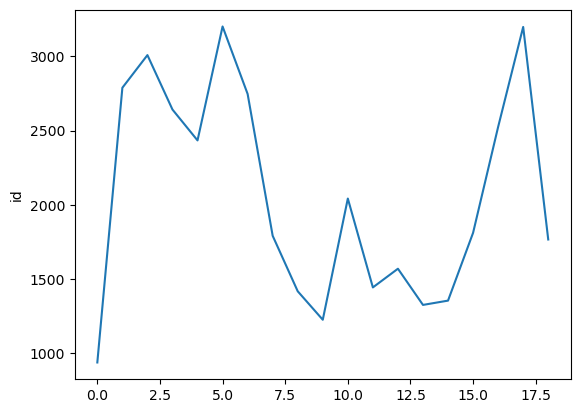

In [84]:
import seaborn as sns

sns.lineplot(df_grp.id)